In [ ]:
import pandas as pd
import plotly.express as px
import requests

Тут я экспортировал три таблицы:
- Платные парковки на улично-дорожной сети
- Перехватывающие парковки
- Платные парковки закрытого типа

Я провел некий ресёрч, и понял, что все они нам нужны. Посмотрим ВСЕ платные парковки Москвы.
а ещё с датасетом повезло, он сразу чистый!!!! респект правительству Москвы за такое

а, ну и не всё нам потребуется в данном проекте, поэтому немного поудалять придётся.




In [144]:
api_key = "e038a330-ed45-405f-8c37-7f1e961d24f8"
base_url = "https://apidata.mos.ru/v1/datasets/{}/rows"
dataset_ids = {
    "df_1681_1": {"id": 1681, "columns": ["Name", "CountSpaces", "geoData"]},
    "df_623_2": {"id": 623, "columns": ["ParkingName", "CarCapacity", "geoData"]},
    "df_622_3": {"id": 622, "columns": ["ParkingName", "CarCapacity", "geoData"]}
}

In [146]:
def get_data_moscow(dataset_id, columns, limit=1000):
    url = base_url.format(dataset_id)
    all_data = []
    skip = 0

    while True:
        params = {"api_key": api_key, "$top": limit, "$skip": skip}
        response = requests.post(url, json=columns, params=params)
        data = response.json()

        if not data:
            break

        for row in data:
            cells = row.get("Cells", {})
            all_data.append({col: cells.get(col) for col in columns})

        skip += limit

    return pd.DataFrame(all_data)

dataframes = {df_name: get_data_moscow(info["id"], info["columns"]) for df_name, info in dataset_ids.items()}
df_1681_1 = dataframes["df_1681_1"]
df_623_2 = dataframes["df_623_2"]
df_622_3 = dataframes["df_622_3"]

In [148]:
df1 = df_1681_1 
df2 = df_623_2
df3 = df_622_3 

In [150]:
df2.columns = ['Name','CountSpaces', 'geoData']
df3.columns = ['Name', 'CountSpaces', 'geoData']

In [158]:
print(df1['geoData'].head(4))
print(df2['geoData'].head(4))
print(df3['geoData'].head(4))


0    {'coordinates': [[[37.56734, 55.82535], [37.56...
1    {'coordinates': [[[37.534988, 55.777171], [37....
2    {'coordinates': [[[37.506231, 55.695756], [37....
3    {'coordinates': [[[37.406848, 55.751346], [37....
Name: geoData, dtype: object
0    {'coordinates': [[[37.641710469, 55.788063023]...
1    {'coordinates': [[[37.6430601, 55.7841542], [3...
2    {'coordinates': [[[37.64203, 55.787132], [37.6...
3    {'coordinates': [[[37.642288, 55.786428], [37....
Name: geoData, dtype: object
0    {'coordinates': [37.5359935, 55.6394915], 'typ...
1    {'coordinates': [37.5342445, 55.6399985], 'typ...
2    {'coordinates': [37.789715, 55.750969], 'type'...
3    {'coordinates': [37.820858, 55.7128505], 'type...
Name: geoData, dtype: object


тут возникала проблема что словарики разные и ничего не работала, поэтому проще сначала разбить координаты и лишь потом сделать большой датасетик(как сетик роллов)

In [161]:
df1['longitude'] = df1['geoData'].apply(lambda x: x['coordinates'][0][0][0])
df1['latitude'] = df1['geoData'].apply(lambda x: x['coordinates'][0][0][1])
df2['longitude'] = df2['geoData'].apply(lambda x: x['coordinates'][0][0][0])
df2['latitude'] = df2['geoData'].apply(lambda x: x['coordinates'][0][0][1])
df3['longitude'] = df3['geoData'].apply(lambda x: x['coordinates'][0])
df3['latitude'] = df3['geoData'].apply(lambda x: x['coordinates'][1])

In [163]:
df1['Type'] = 'Закрытая парковка'
df2['Type'] = 'Уличная парковка'
df3['Type'] = 'Перехватывающая парковка'
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_df

,Name,CountSpaces,geoData,longitude,latitude,Type
0,Парковка № 9401,51,"{'coordinates': [[[37.56734, 55.82535], [37.56...",37.567340,55.825350,Закрытая парковка
1,Парковка № 9402,25,"{'coordinates': [[[37.534988, 55.777171], [37....",37.534988,55.777171,Закрытая парковка
2,Парковка № 9065,132,"{'coordinates': [[[37.506231, 55.695756], [37....",37.506231,55.695756,Закрытая парковка
3,Парковка № 9061,82,"{'coordinates': [[[37.406848, 55.751346], [37....",37.406848,55.751346,Закрытая парковка
4,Парковка № 9704,65,"{'coordinates': [[[37.7975, 55.637889], [37.79...",37.797500,55.637889,Закрытая парковка
...,...,...,...,...,...,...
12237,Перехватывающая парковка №9142 метрополитена 5...,171,"{'coordinates': [37.790043, 55.788297], 'type'...",37.790043,55.788297,Перехватывающая парковка
12238,Перехватывающая парковка №9143 метрополитена 5...,267,"{'coordinates': [37.868208, 55.7454825], 'type...",37.868208,55.745483,Перехватывающая парковка
12239,Перехватывающая парковка №9177 метрополитена 5...,97,"{'coordinates': [37.356432871, 55.858347518], ...",37.356433,55.858348,Перехватывающая парковка
12240,Перехватывающая парковка №9182,95,"{'coordinates': [37.58879, 55.848853], 'type':...",37.588790,55.848853,Перехватывающая парковка


In [165]:
combined_df["CountSpaces"] = pd.to_numeric(combined_df["CountSpaces"], errors="coerce")

In [167]:
print(combined_df["CountSpaces"].sum())

139979


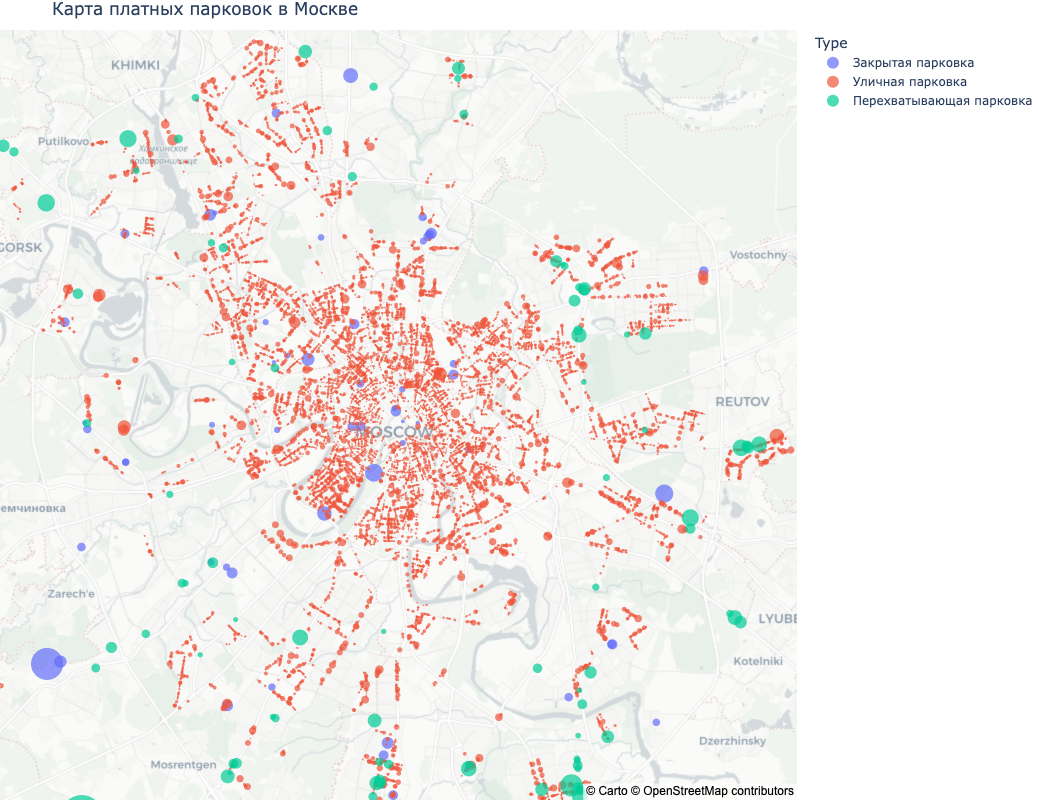

In [171]:
fig = px.scatter_mapbox(
    combined_df,
    lat="latitude",
    lon="longitude",
    hover_name="Name",
    size="CountSpaces",  
    color="Type",
    title="Карта платных парковок в Москве",
    zoom=10,
    mapbox_style="carto-positron",
    size_max=30 
)


fig.update_layout(
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
    height=800,
    width=1000
)

fig.show()

Теперь давайте сделаем такую же прекрасную карту для Санкт-Петербурга. Там с данными всё не так хорошо, но я вроде нашел где можно что-то спарсить

In [178]:
from bs4 import BeautifulSoup

url = "https://gcup.spb.ru/zona-platnoj-parkovki/granicy-zony-platnoj-parkovkii/"
response = requests.get(url, verify=False)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')
print(f"Количество таблиц: {len(tables)}")

for i, table in enumerate(tables, 1):
    rows = table.find_all('tr')
    data = []
    for row in rows:
        cells = row.find_all(['td', 'th'])
        data.append([cell.get_text(strip=True) for cell in cells])
    print(f"\nТаблица {i}:")
    for row in data:
        print(row)

/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'gcup.spb.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



Количество таблиц: 8

Таблица 1:
['ЦЕНТРАЛЬНЫЙ РАЙОН']
['Парковочная зона«Смольнинское»\xa0№7801']
['1-я Советская ул. (от Орловского пер. до Суворовского пр. и Невского пр.)']
['2-я Советская ул. (от Лиговского пр. до Мытнинской ул. и пр.Бакунина)']
['3-я Советская ул. (от Греческого пр. до пр.Бакунина)']
['4-я Советская ул. (от Лиговского пр. до Овсянниковского сада)']
['5-я Советская ул. (от Лиговского пр. до Мытнинской ул.)']
['6-я Советская ул. (от Греческого пр. до Мытнинской ул.)']
['7-я Советская ул. (от Греческого пр. до Мытнинской ул.)']
['8-я Советская ул. (от Греческого пр. до Новгородской ул. и Старорусской ул.)']
['9-я Советская ул. (от Греческого пр. до Мытнинской ул.)']
['10-я Советская ул. (от ул.Моисеенко и Дегтярной ул. до Новгородской ул.)']
['ул.Александра Невского (от Невского пр. до Херсонской ул.)']
['пл.Александра Невского (на пересечении Невского пр., Чернорецкого пер., Лаврского проезда, пр.Обуховской Обороны и Синопской наб.)']
['Амбарная ул. (от Херсонской 

Сделать что-то хоть немного адекватное с этим нельзя, тут буквально каждая вторая строчка имеет свой "стиль" написания хахаха

Сначала была идея отобрать адрес по словам ул, проезд и тд, но тут есть парковки, где указано их местоположение относительно других улиц, например:

['Ковенский пер. (от ул.Маяковского до Лиговского пр.) на участке от ул.Восстания до Лиговского пр.']

но я правда попытаюсь что-то почистить

In [234]:
all_spb_data = []

for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all(['td', 'th'])
        all_spb_data.append([cell.get_text(strip=True) for cell in cells])

df_spb = pd.DataFrame(all_spb_data)

df_spb

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,ЦЕНТРАЛЬНЫЙ РАЙОН,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Парковочная зона«Смольнинское» №7801,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1-я Советская ул. (от Орловского пер. до Сувор...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2-я Советская ул. (от Лиговского пр. до Мытнин...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3-я Советская ул. (от Греческого пр. до пр.Бак...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,Спасский пер. (от наб. кан. Грибоедова до Сенн...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
873,Столярный пер. (от Казанской ул. до наб. кан. ...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
874,Фонарный пер. (от наб. р. Мойки до наб. кан. Г...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
875,наб. р. Фонтанки (нечетная сторона) (от наб. р...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [236]:
# Оставляем только первый столбец
df_spb = df_spb.iloc[:, 0]
df_spb = df_spb.to_frame(name="Улица")
df_spb

,Улица
0,ЦЕНТРАЛЬНЫЙ РАЙОН
1,Парковочная зона«Смольнинское» №7801
2,1-я Советская ул. (от Орловского пер. до Сувор...
3,2-я Советская ул. (от Лиговского пр. до Мытнин...
4,3-я Советская ул. (от Греческого пр. до пр.Бак...
...,...
872,Спасский пер. (от наб. кан. Грибоедова до Сенн...
873,Столярный пер. (от Казанской ул. до наб. кан. ...
874,Фонарный пер. (от наб. р. Мойки до наб. кан. Г...
875,наб. р. Фонтанки (нечетная сторона) (от наб. р...


In [238]:
def bad_text(text):
    words_to_remove = ["наб.", "пер.", "ул.", "пр.", "пл.", "аллея"]
    for word in words_to_remove:
        if word in text:
            return False
    return True
df_spb["Улица"] = df_spb["Улица"].apply(
    lambda x: x.split('(')[0].strip() if '(' in x else x.strip()
)

df_spb_clean = df_spb[~df_spb["Улица"].apply(bad_text)]
print(df_spb_clean)

                 Улица
2    1-я Советская ул.
3    2-я Советская ул.
4    3-я Советская ул.
5    4-я Советская ул.
6    5-я Советская ул.
..                 ...
872      Спасский пер.
873     Столярный пер.
874      Фонарный пер.
875   наб. р. Фонтанки
876       Щепяной пер.

[778 rows x 1 columns]


убрали указания в скобках, и почистили всё, что не содержит наб., пер., ул., и тд.

проблема осталась, часть названий точно не найдутся в картах(проверено)

пока не решил что делать:(